In [1]:
#
from datetime import datetime
#target_code = '033340'
#date_from = '1995-5-2'
date_from  = '2010-1-1'
today=  datetime.now().strftime('%Y-%m-%d')
today

'2021-03-10'

In [2]:
# 기본 모듈 로드
import pandas as pd
from marcap import marcap_data
import matplotlib.pyplot as plt

In [3]:
# 쌍방울 코드 검색하기
target_name = "좋은사람들"
df = pd.read_csv("marcap/data/marcap-2021.csv.gz")
target_code = df[df["Name"] == target_name]["Code"].iloc[0]
target_code

'033340'

In [4]:
# 그래프 설정
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

plt.rcParams["figure.figsize"] = (16,4)
plt.rcParams['lines.linewidth'] = 0.5
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams["xtick.minor.visible"] = True 

pd.options.display.float_format = '{:.2f}'.format

In [5]:
df = marcap_data(date_from, today, target_code)

c:\users\j\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
c:\users\j\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [6]:
latest_stocks = df.iloc[-1]['Stocks']
latest_stocks

49908224.0

In [7]:
df['Adj Close'] = df['Close'] / latest_stocks * df['Stocks']

<AxesSubplot:xlabel='Date'>

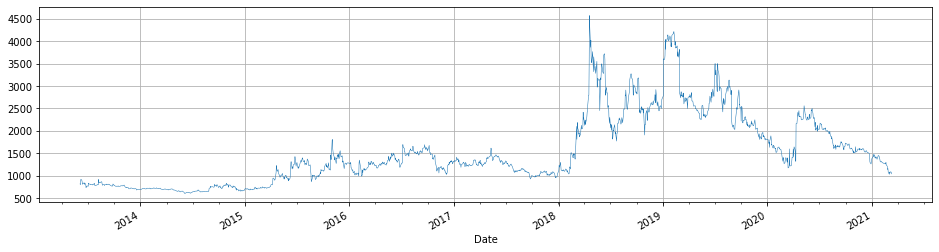

In [8]:
df['Adj Close'].plot()

In [9]:
df['Adj Close'].iloc[-1]

1040.0

In [10]:
df.iloc[-1]

Code                  033340
Name                   좋은사람들
Market                KOSDAQ
Dept                   중견기업부
Close                 1040.0
ChangeCode                 2
Changes                -15.0
ChagesRatio              NaN
Open                  1065.0
High                  1065.0
Low                   1035.0
Volume              374448.0
Amount           392062605.0
Marcap         51904552960.0
Stocks            49908224.0
MarketId                 KSQ
Rank                    2067
ChangesRatio           -1.42
Adj Close             1040.0
Name: 2021-03-10 00:00:00, dtype: object

In [11]:
import scipy.stats

In [12]:
c_min = df['Adj Close'].min()
c_max = df['Adj Close'].max()
c_mean = df['Adj Close'].mean()
c_std = df['Adj Close'].std()

c_current = df['Adj Close'].iloc[-1]

c_norm = scipy.stats.norm(c_mean, c_std)
print(c_min, c_max, c_mean, c_current, c_norm.cdf(c_current))

600.0831752698713 4572.479097633288 1524.228626701773 1040.0 0.267138832745775


In [13]:
c_mean/c_current

1.4656044487517048

<AxesSubplot:xlabel='Date'>

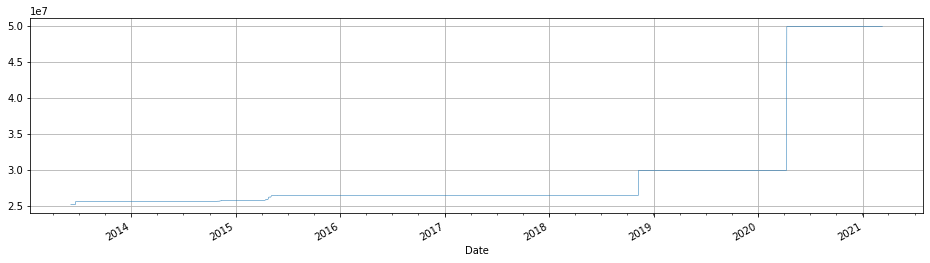

In [14]:
df['Stocks'].plot()